# Análise descritiva de Dados Municipios da Paraíba

Este código tem como objetivo identificar as tendencias de comportamento e correlação entre as informações de pib, abertura e fechamento de empresas nos municipios paraibanos.  
Analisando principalmente os municipios de  **Picuí, Pedra Lavrada, São Vicente do Seridó, Baraúna e Nova Palmeira**, que estão sendo visados como possiveis locais para a construção de usinas eólicas.

-> **OBJETIVO PRINCIPAL:** Elaboração de pesquisa na região da Serra da Palmeira para identificar o mapa de oportunidades na região.

-> Municípios que possuem usinas eólica em operação entre [] está o ano de implementação da primeira usina eólica: 
- Junco do Seridó [2023]
- Mataraca [2007]
- Santa Luzia [2017]
- São José do Sabugi [2017] 


# Definição das Variáveis e Imports

In [235]:
import pandas as pd 
import numpy as np
import scipy as sp
import matplotlib as plt 
import seaborn as sns   


file = r"C:\Users\bianc\Desktop\AgentesDeDados\SantaLuzia\AnalisePython\dados\dados(in).csv"
file_geoloc = r"C:\Users\bianc\Desktop\AgentesDeDados\SantaLuzia\AnalisePython\dados\coordenadas_municipios_brasil.xls"
file_dtb = r"C:\Users\bianc\Desktop\AgentesDeDados\SantaLuzia\AnalisePython\dados\dtb_municipios (1).csv"
municipios_serra = {'Picuí': 2511400, 
                    'Pedra Lavrada':2511103, 
                    'São Vicente do Seridó':2515401, 
                    'Baraúna':2501534, 
                    'Nova Palmeira':2510303}

municipios_eolica = {'Junco do Seridó':2507804, 
                     'Mataraca':2509305, 
                     'Santa Luzia':2513406, 
                     'São José do Sabugi':2514701}

# Colunas: Index(['CO_IBGE7', 'MUNICIPIO', 'ANO', 'PIB', 'POPULACAO_ESTIMADA',
#       'PIB_PERCAPTA', 'empresas_geral', 'empresas_hospedagem',
#       'empresas_saude', 'empresas_transporte', 'empresas_alimenticio',
#       'empresas_vestuario'],
#      dtype='object')

df_geoloc = pd.read_excel(file_geoloc, engine='xlrd'
                         ).rename(columns={'GEOCODIGO_MUNICIPIO':'CO_IBGE7'}
                         ).filter(['CO_IBGE7', 'LATITUDE', 'LONGITUDE'])

df_dtb = pd.read_csv(file_dtb, sep=';', encoding='latin1'
                    ).rename(columns={'cod_mundv':'CO_IBGE7'}
                    ).filter(['CO_IBGE7', 'nome_micro', 'nome_meso'])
df = pd.read_csv(file, sep=',')

df = df = df.assign(total_empresas=lambda x: (
    x['empresas_geral'] + 
    x['empresas_hospedagem'] + 
    x['empresas_saude'] + 
    x['empresas_transporte'] + 
    x['empresas_alimenticio'] + 
    x['empresas_vestuario']
).fillna(0).astype(int)).merge( df_geoloc, on='CO_IBGE7', how='left').merge(df_dtb, on='CO_IBGE7', how='left')

df_serra = df.query('CO_IBGE7 in @municipios_serra.values()')
df_eolica = df.query('CO_IBGE7 in @municipios_eolica.values()')




In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4460 entries, 0 to 4459
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CO_IBGE7              4460 non-null   int64  
 1   MUNICIPIO             4460 non-null   object 
 2   ANO                   4460 non-null   int64  
 3   PIB                   4460 non-null   int64  
 4   POPULACAO_ESTIMADA    4014 non-null   float64
 5   PIB_PERCAPTA          4014 non-null   float64
 6   empresas_geral        4327 non-null   float64
 7   empresas_hospedagem   4327 non-null   float64
 8   empresas_saude        4327 non-null   float64
 9   empresas_transporte   4327 non-null   float64
 10  empresas_alimenticio  4327 non-null   float64
 11  empresas_vestuario    4327 non-null   float64
 12  total_empresas        4460 non-null   int64  
 13  LATITUDE              4460 non-null   float64
 14  LONGITUDE             4460 non-null   float64
 15  nome_micro           

In [237]:
df.columns

Index(['CO_IBGE7', 'MUNICIPIO', 'ANO', 'PIB', 'POPULACAO_ESTIMADA',
       'PIB_PERCAPTA', 'empresas_geral', 'empresas_hospedagem',
       'empresas_saude', 'empresas_transporte', 'empresas_alimenticio',
       'empresas_vestuario', 'total_empresas', 'LATITUDE', 'LONGITUDE',
       'nome_micro', 'nome_meso'],
      dtype='object')

In [238]:
df.describe()

,CO_IBGE7,ANO,PIB,POPULACAO_ESTIMADA,PIB_PERCAPTA,empresas_geral,empresas_hospedagem,empresas_saude,empresas_transporte,empresas_alimenticio,empresas_vestuario,total_empresas,LATITUDE,LONGITUDE
count,4.460000e+03,4460.000000,4.460000e+03,4014.000000,4014.000000,4327.000000,4327.000000,4327.000000,4327.00000,4327.000000,4327.000000,4460.000000,4460.000000,4460.000000
mean,2.508704e+06,2011.500000,1.865173e+08,17162.255107,7121.753819,282.417379,1.475387,8.486018,7.78715,20.645713,5.688237,316.763453,-7.063472,-36.644336
std,5.059185e+03,5.766928,1.077328e+09,57109.112425,5825.840695,1888.254964,8.247741,75.417879,43.67257,152.046941,35.531622,2164.640190,0.390655,1.149174
min,2.500106e+06,2002.000000,3.506000e+06,1050.000000,1447.593528,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-8.157119,-38.678303
25%,2.504157e+06,2006.750000,2.152450e+07,4367.500000,3638.186754,19.000000,0.000000,0.000000,0.00000,1.000000,0.000000,19.000000,-7.330932,-37.722721
50%,2.509008e+06,2011.500000,4.094000e+07,7176.000000,6583.182309,50.000000,0.000000,0.000000,0.00000,3.000000,0.000000,52.000000,-7.065368,-36.486276
75%,2.513208e+06,2016.250000,8.487475e+07,14742.000000,9099.141818,133.000000,1.000000,2.000000,3.00000,9.000000,2.000000,144.250000,-6.769855,-35.628161
max,2.517407e+06,2021.000000,2.224428e+10,825796.000000,171143.971810,61263.000000,198.000000,2537.000000,1323.00000,5336.000000,905.000000,71562.000000,-6.188575,-34.813930


In [239]:
df['ANO'].unique()

array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [240]:
ocorrencias_por_cidade = df['CO_IBGE7'].value_counts()
cidades_com_menos_de_20 = ocorrencias_por_cidade[ocorrencias_por_cidade < 20]
print(cidades_com_menos_de_20)

Series([], Name: count, dtype: int64)


In [241]:
nan_count = df.isna().sum()
nan_percentage = (df.isna().mean() * 100).round(2)
nan_summary = pd.DataFrame({
    'Total de registros': df.shape[0],
    'Quantidade de NaN': nan_count,
    'Porcentagem de NaN (%)': nan_percentage
})
nan_summary


,Total de registros,Quantidade de NaN,Porcentagem de NaN (%)
CO_IBGE7,4460,0,0.00
MUNICIPIO,4460,0,0.00
ANO,4460,0,0.00
PIB,4460,0,0.00
POPULACAO_ESTIMADA,4460,446,10.00
PIB_PERCAPTA,4460,446,10.00
empresas_geral,4460,133,2.98
empresas_hospedagem,4460,133,2.98
empresas_saude,4460,133,2.98
empresas_transporte,4460,133,2.98


# Análise de Comportamento das variáveis para as Cidades *ÉOLICAS*

- Junco do Seridó [2023]
- Mataraca [2007]
- Santa Luzia [2017]
- São José do Sabugi [2017] 


In [ ]:
import folium
import json

# Criar o mapa centralizado na Paraíba
mapa = folium.Map(location=[-7.1214, -36.7242], zoom_start=8)

# Caminho para o arquivo GeoJSON
geojson_path = r'C:\Users\bianc\Desktop\AgentesDeDados\SantaLuzia\AnalisePython\dados\geojs-25-mun.json'

# Ler o arquivo GeoJSON com a codificação correta
with open(geojson_path, encoding='utf-8') as f:
    geojson_data = json.load(f)

# Lista das cidades específicas que você quer colorir
cidades_especificas = municipios_eolica.keys()

# Função de estilo que colore as cidades específicas de uma cor diferente
def estilo_cidades(feature):
    municipio = feature['properties']['name']  # Ajuste essa chave conforme o seu arquivo GeoJSON
    if municipio in cidades_especificas:
        return {
            'fillColor': '#4BA64E',  # Cor para as cidades específicas
            'color': 'black',
            'weight': 1,
            'fillOpacity': 1.0
        }
    elif municipio in municipios_serra.keys():
        return {
            'fillColor': '#E62E7F',  # Cor padrão para as outras cidades
            'color': 'black',
            'weight': 1,
            'fillOpacity': 1.0
        }
    else:
        return {
            'fillColor': '#3C3437',  # Cor padrão para as outras cidades
            'color': 'black',
            'weight': 1,
            'fillOpacity': 0.5
        }

# Adicionar a camada GeoJSON estilizada
folium.GeoJson(
    geojson_data,
    name='municipios',
    style_function=estilo_cidades
).add_to(mapa)

# Adicionar o controle de camadas
folium.LayerControl().add_to(mapa)

mapa

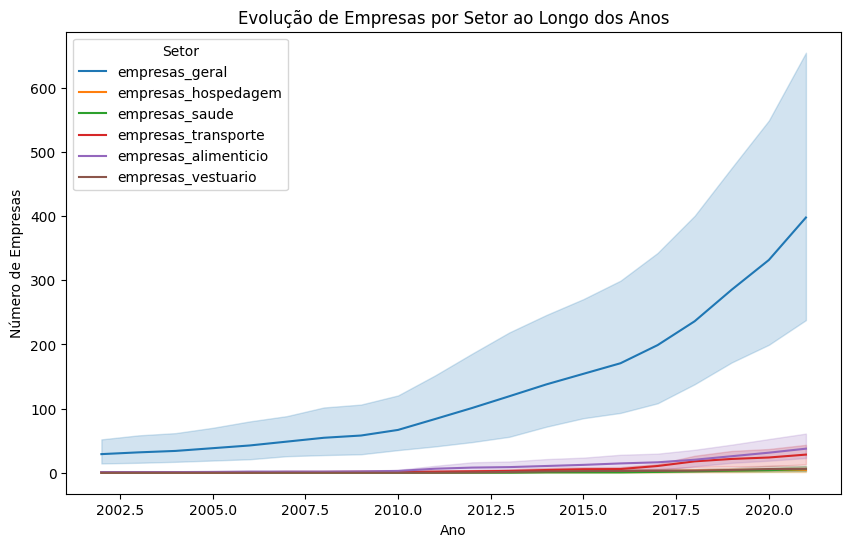

In [277]:
colunas = ['empresas_geral', 'empresas_hospedagem', 
           'empresas_saude', 'empresas_transporte', 
           'empresas_alimenticio', 'empresas_vestuario']

# Transformar o DataFrame para o formato longo (long format)
df_long = df_eolica.melt(id_vars=['ANO'], value_vars=colunas, var_name='Setor', value_name='Número de Empresas')
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_long, x='ANO', y='Número de Empresas', hue='Setor')
plt.title('Evolução de Empresas por Setor ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Número de Empresas')
plt.grid(False)
plt.show()


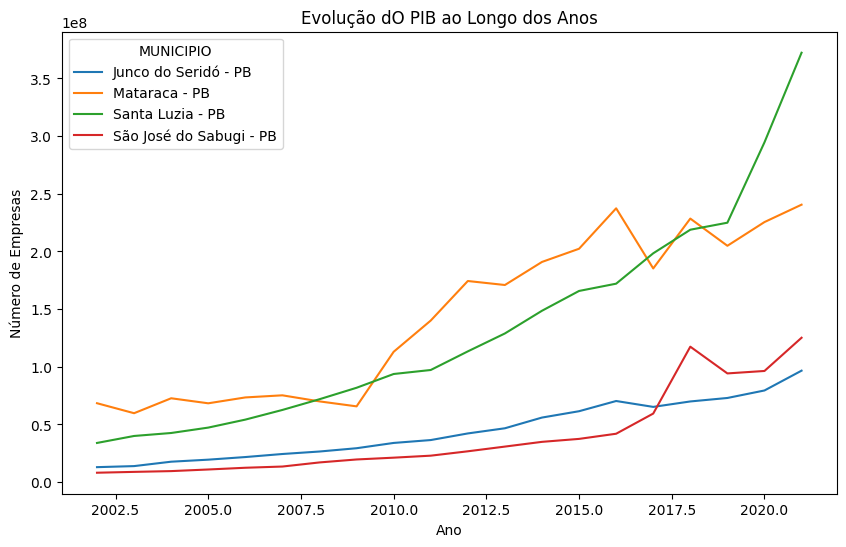

In [281]:

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_eolica, x='ANO', y='PIB', hue='MUNICIPIO')
plt.title('Evolução dO PIB ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Número de Empresas')
plt.grid(False)

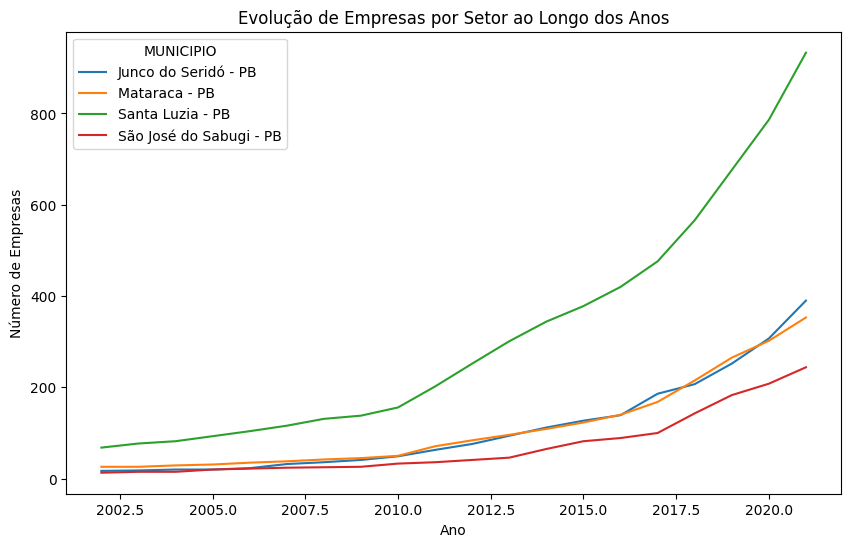

In [278]:

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_eolica, x='ANO', y='total_empresas', hue='MUNICIPIO')
plt.title('Evolução de Empresas por Setor ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Número de Empresas')
plt.grid(False)
plt.show()

## Junco do Seridó

In [244]:
junco = df_eolica.query('CO_IBGE7 == 2507804')
junco.describe()

,CO_IBGE7,ANO,PIB,POPULACAO_ESTIMADA,PIB_PERCAPTA,empresas_geral,empresas_hospedagem,empresas_saude,empresas_transporte,empresas_alimenticio,empresas_vestuario,total_empresas,LATITUDE,LONGITUDE
count,20.0,20.00000,2.000000e+01,18.000000,18.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.0000,20.000000,20.000000
mean,2507804.0,2011.50000,4.483215e+07,6727.888889,6720.263012,97.50000,0.100000,1.050000,4.450000,6.550000,0.800000,110.4500,-6.993338,-36.716441
std,0.0,5.91608,2.497149e+07,458.437870,3413.679627,90.99653,0.307794,1.700619,6.244787,7.479621,1.196486,107.1725,0.000000,0.000000
min,2507804.0,2002.00000,1.293100e+07,6010.000000,2151.580699,16.00000,0.000000,0.000000,0.000000,1.000000,0.000000,17.0000,-6.993338,-36.716441
25%,2507804.0,2006.75000,2.367900e+07,6253.250000,3654.335902,27.00000,0.000000,0.000000,0.750000,2.000000,0.000000,29.7500,-6.993338,-36.716441
50%,2507804.0,2011.50000,3.930250e+07,6839.500000,6489.738342,64.50000,0.000000,0.000000,1.000000,4.000000,0.000000,69.5000,-6.993338,-36.716441
75%,2507804.0,2016.25000,6.636675e+07,7109.250000,9654.772785,135.25000,0.000000,1.250000,5.750000,7.250000,1.250000,150.7500,-6.993338,-36.716441
max,2507804.0,2021.00000,9.660200e+07,7238.000000,13346.504559,332.00000,1.000000,6.000000,18.000000,29.000000,4.000000,390.0000,-6.993338,-36.716441


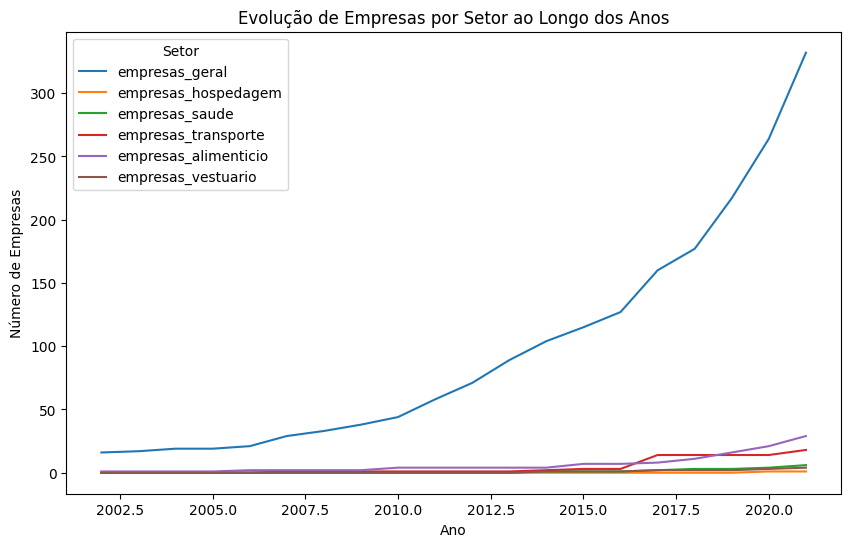

In [272]:
colunas = ['empresas_geral', 'empresas_hospedagem', 
           'empresas_saude', 'empresas_transporte', 
           'empresas_alimenticio', 'empresas_vestuario']

# Transformar o DataFrame para o formato longo (long format)
df_long = junco.melt(id_vars=['ANO'], value_vars=colunas, var_name='Setor', value_name='Número de Empresas')
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_long, x='ANO', y='Número de Empresas', hue='Setor')
plt.title('Evolução de Empresas por Setor ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Número de Empresas')
plt.grid(False)
plt.show()


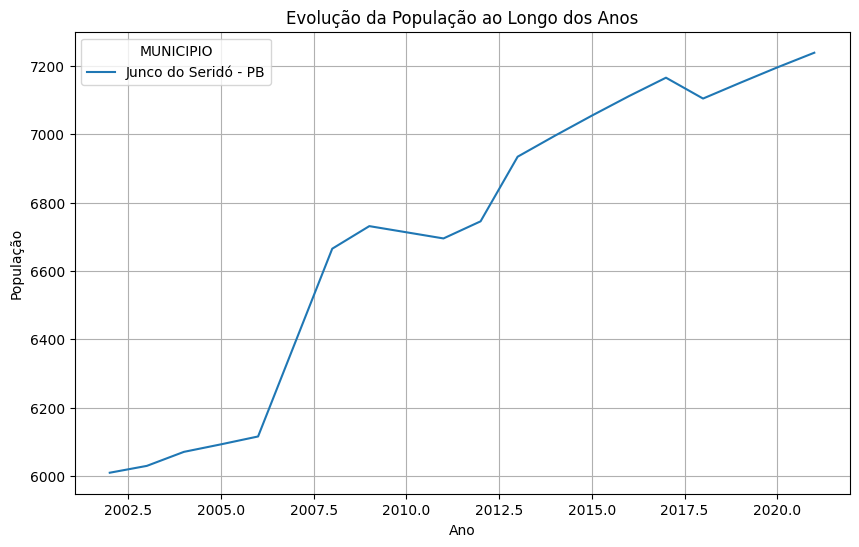

In [249]:

# Criar o gráfico de linha com Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=junco, x='ANO', y='POPULACAO_ESTIMADA', hue='MUNICIPIO')

# Adicionar título e rótulos
plt.title('Evolução da População ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('População')	

# Exibir o gráfico
plt.grid(True)
plt.show()


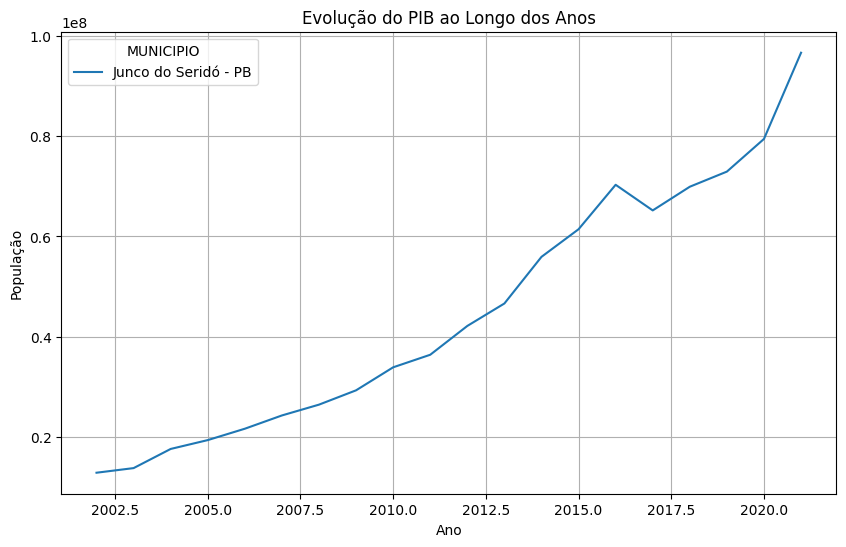

In [250]:
# Criar o gráfico de linha com Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=junco, x='ANO', y='PIB', hue='MUNICIPIO')

# Adicionar título e rótulos
plt.title('Evolução do PIB ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('População')	

# Exibir o gráfico
plt.grid(True)
plt.show()


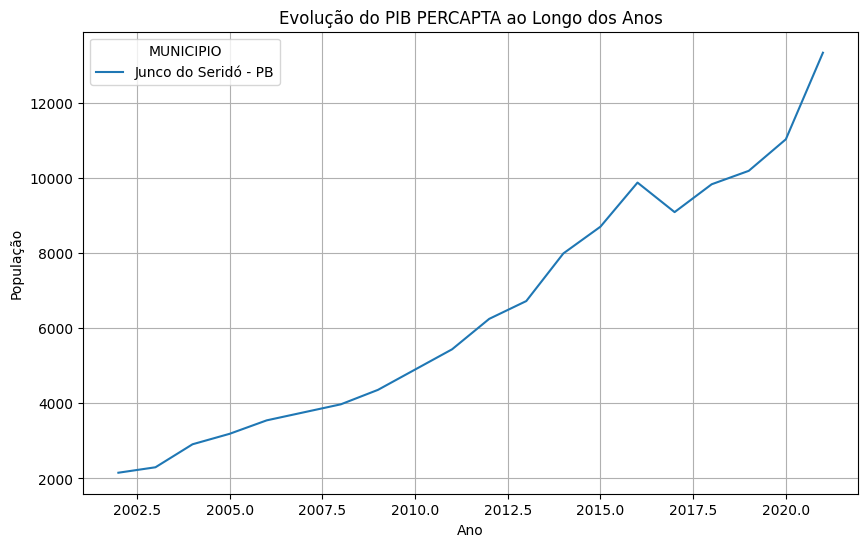

In [257]:
# Criar o gráfico de linha com Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=junco, x='ANO', y='PIB_PERCAPTA', hue='MUNICIPIO')

# Adicionar título e rótulos
plt.title('Evolução do PIB PERCAPTA ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('População')	

# Exibir o gráfico
plt.grid(True)
plt.show()


## Santa Luzia

In [268]:
santa_luzia = df_eolica.query('CO_IBGE7 == 2513406')

In [269]:
santa_luzia.describe()

,CO_IBGE7,ANO,PIB,POPULACAO_ESTIMADA,PIB_PERCAPTA,empresas_geral,empresas_hospedagem,empresas_saude,empresas_transporte,empresas_alimenticio,empresas_vestuario,total_empresas,LATITUDE,LONGITUDE
count,20.0,20.00000,2.000000e+01,18.000000,18.000000,20.00000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,2.000000e+01
mean,2513406.0,2011.50000,1.331172e+08,14968.277778,9163.214521,273.20000,3.950000,2.250000,9.800000,22.00000,3.750000,314.950000,-6.871863,-3.692168e+01
std,0.0,5.91608,9.207358e+07,408.958189,6083.962765,212.02969,2.781045,3.209771,13.016589,22.33713,4.586881,256.657764,0.000000,7.290015e-15
min,2513406.0,2002.00000,3.392300e+07,14217.000000,2386.087079,64.00000,1.000000,0.000000,1.000000,2.00000,0.000000,68.000000,-6.871863,-3.692168e+01
25%,2513406.0,2006.75000,6.044800e+07,14703.750000,3979.584079,105.00000,2.000000,1.000000,2.000000,3.00000,0.000000,113.000000,-6.871863,-3.692168e+01
50%,2513406.0,2011.50000,1.052520e+08,14985.500000,8076.173212,204.00000,2.000000,1.000000,3.000000,16.00000,1.000000,227.000000,-6.871863,-3.692168e+01
75%,2513406.0,2016.25000,1.786090e+08,15339.750000,12463.424406,374.75000,6.000000,1.000000,9.750000,35.50000,7.000000,434.000000,-6.871863,-3.692168e+01
max,2513406.0,2021.00000,3.722920e+08,15470.000000,24065.416936,784.00000,9.000000,12.000000,43.000000,72.00000,13.000000,933.000000,-6.871863,-3.692168e+01


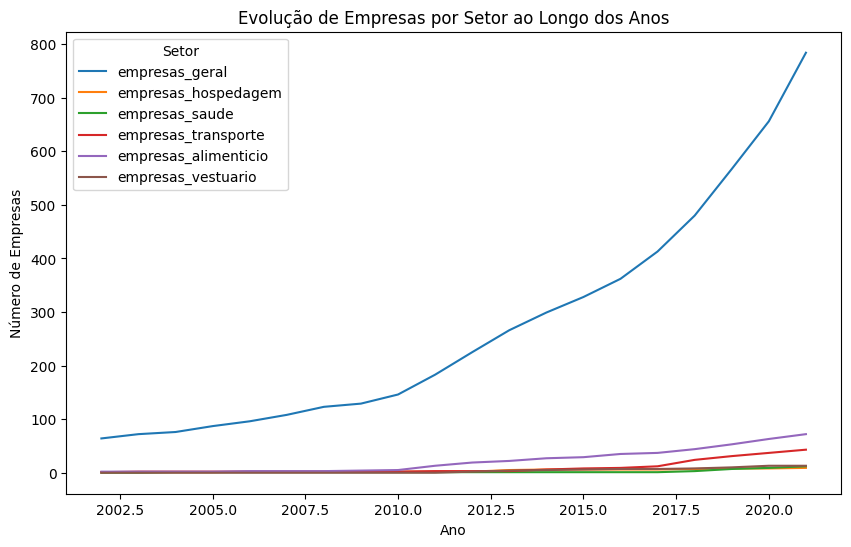

In [271]:
colunas = ['empresas_geral', 'empresas_hospedagem', 
           'empresas_saude', 'empresas_transporte', 
           'empresas_alimenticio', 'empresas_vestuario']

# Transformar o DataFrame para o formato longo (long format)
df_long = santa_luzia.melt(id_vars=['ANO'], value_vars=colunas, var_name='Setor', value_name='Número de Empresas')
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_long, x='ANO', y='Número de Empresas', hue='Setor')
plt.title('Evolução de Empresas por Setor ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Número de Empresas')
plt.grid(False)
plt.show()


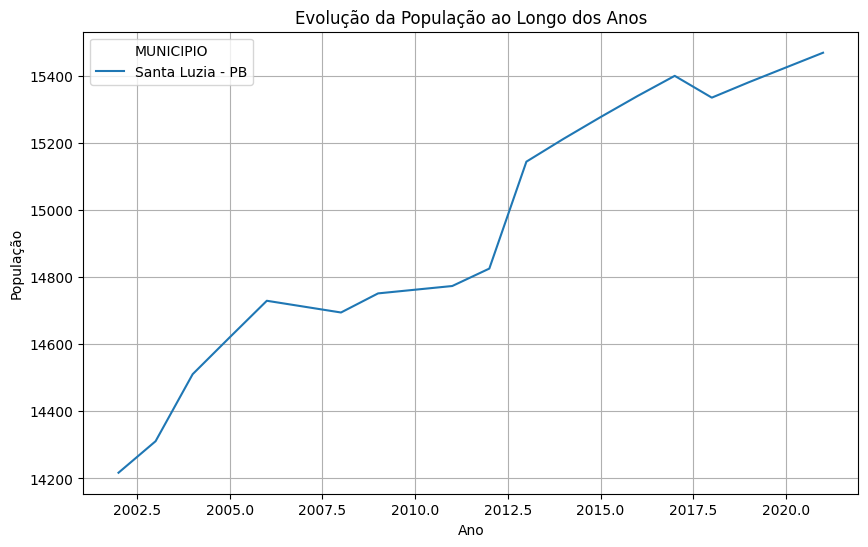

In [273]:
# Criar o gráfico de linha com Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=santa_luzia, x='ANO', y='POPULACAO_ESTIMADA', hue='MUNICIPIO')

# Adicionar título e rótulos
plt.title('Evolução da População ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('População')	

# Exibir o gráfico
plt.grid(True)
plt.show()

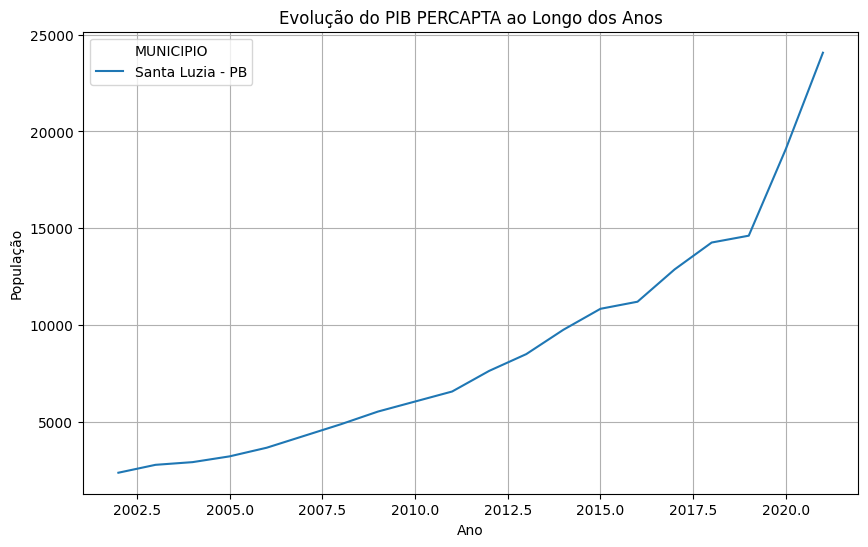

In [274]:
# Criar o gráfico de linha com Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=santa_luzia, x='ANO', y='PIB_PERCAPTA', hue='MUNICIPIO')

# Adicionar título e rótulos
plt.title('Evolução do PIB PERCAPTA ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('População')	

# Exibir o gráfico
plt.grid(True)
plt.show()


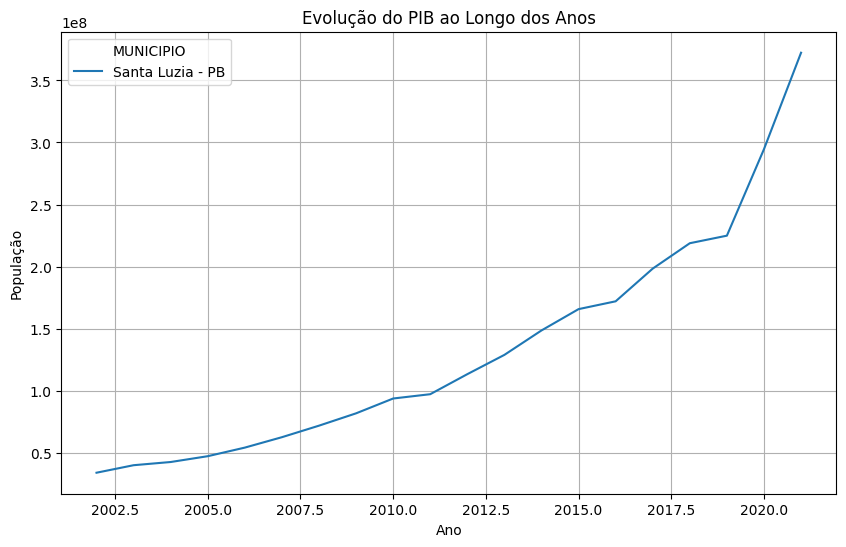

In [276]:
# Criar o gráfico de linha com Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=santa_luzia, x='ANO', y='PIB', hue='MUNICIPIO')

# Adicionar título e rótulos
plt.title('Evolução do PIB ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('População')	

# Exibir o gráfico
plt.grid(True)
plt.show()


## Aplicação de Teste de Correlação

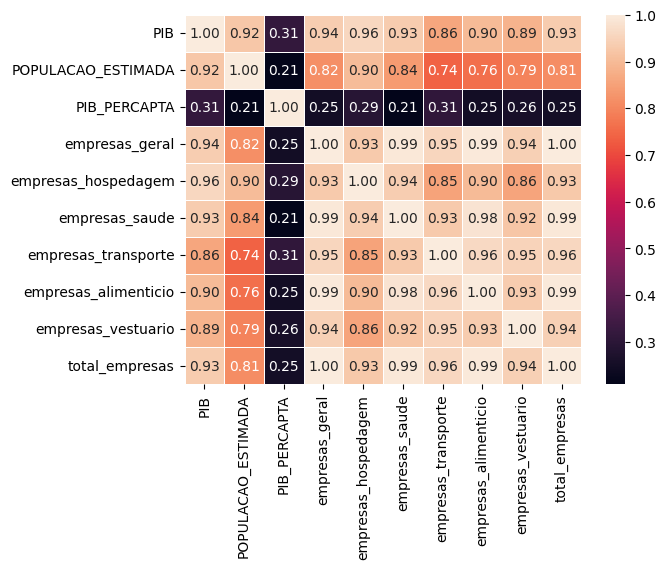

In [243]:
# Retirando valores NaN e aplicando correlação
correlacao = df.copy().drop(columns=['CO_IBGE7', 'ANO', 
                                     'MUNICIPIO', 'nome_micro', 
                                     'nome_meso', 'LATITUDE', 
                                     'LONGITUDE']).dropna().corr()

sns.heatmap(correlacao, annot = True, fmt=".2f", linewidths=.6)
correlacao.to_csv(r"C:\Users\bianc\Desktop\AgentesDeDados\SantaLuzia\AnalisePython\dados\correlacao.csv", sep=';', index=False)